In [1]:
from math import sqrt

import numpy as np

from lab1.src import (
    compute_pareto_mean,
    compute_pareto_variance,
    compute_theta,
    generate_g,
    plot_samples_with_pareto_baseline,
    seed_everything,
    run_tests,
)

seed_everything(0)

In [2]:
N = 6
S = 8
I1 = 5
I2 = 4

alpha_1 = 0.1
alpha_2 = 0.01

tau = 1 / (1 + I1)
p1 = (alpha_1 ** (1 - tau)) * (alpha_2 ** tau)
p2 = 5 * p1 / np.sqrt(S)

N1 = 10 * (2 + N)
N2 = 100 * (2 + N)
l = int((I2 + 2.5) / 2)

thetas = {
    1: (0, 1),
    2: (S, N),
    3: (N, S + 2),
    4: (S, S + N),
    5: (-N, S + 4),
}

print(f"""
N = {N}
S = {S}
I1 = {I1}
I2 = {I2}
alpha_1 = {alpha_1}
alpha_2 = {alpha_2}
tau = {tau}
p1 = {p1}
p2 = {p2}
N1 = {N1}
N2 = {N2}
l = {l}
thetas = {thetas}
""")


N = 6
S = 8
I1 = 5
I2 = 4
alpha_1 = 0.1
alpha_2 = 0.01
tau = 0.16666666666666666
p1 = 0.06812920690579613
p2 = 0.12043656049987451
N1 = 80
N2 = 800
l = 3
thetas = {1: (0, 1), 2: (8, 6), 3: (6, 10), 4: (8, 14), 5: (-6, 12)}



In [3]:
theta_0 = thetas[l]
mu0 = compute_pareto_mean(*theta_0)
v0 = compute_pareto_variance(*theta_0)

mu1 = mu0
v1 = N * v0

mu2 = mu0 + 2 * sqrt(v0)
v2 = v0 / S

theta_1 = compute_theta(mu1, v1)
theta_2 = compute_theta(mu2, v2)

print(f"""
theta_0 = {theta_0} | {compute_theta(mu0, v0)} (based on mu0 and v0)
mu0 = {mu0}
v0 = {v0}

theta_1 = {theta_1}
mu1 = {mu1} | {compute_pareto_mean(*theta_1)} (based on theta)
v1 = {v1} | {compute_pareto_variance(*theta_1)} (based on theta)

theta_2 = {theta_2}
mu2 = {mu2} | {compute_pareto_mean(*theta_2)} (based on theta)
v2 = {v2} | {compute_pareto_variance(*theta_2)} (based on theta)
""")


theta_0 = (6, 10) | (6.0, 10.0) (based on mu0 and v0)
mu0 = 6.666666666666667
v0 = 0.5555555555555556

theta_1 = (5.273697218066576, 4.785938897200182)
mu1 = 6.666666666666667 | 6.666666666666666 (based on theta)
v1 = 3.3333333333333335 | 3.333333333333334 (based on theta)

theta_2 = (7.902231125466136, 31.971223758837382)
mu2 = 8.157378651666527 | 8.157378651666527 (based on theta)
v2 = 0.06944444444444445 | 0.06944444444444445 (based on theta)



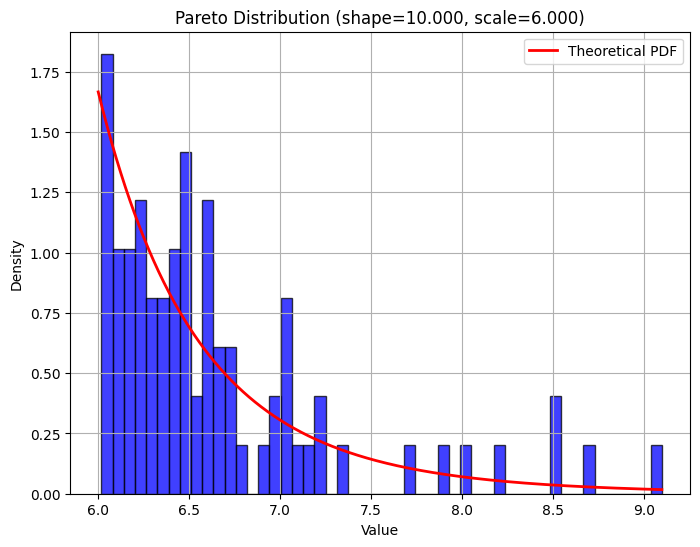

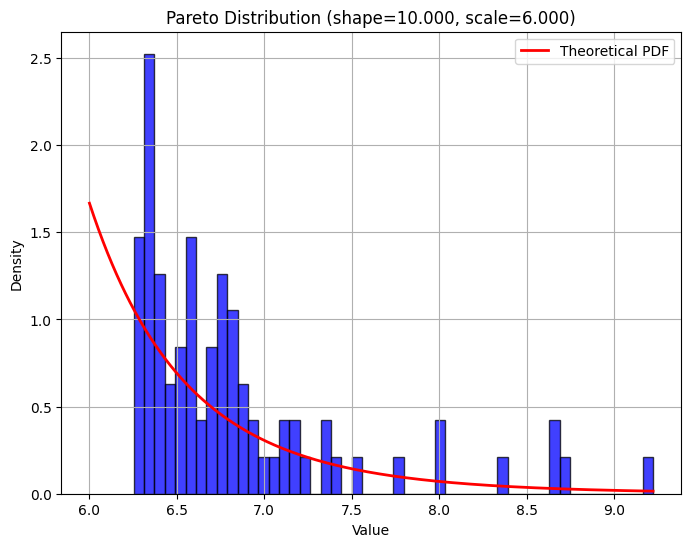

In [4]:
G0 = generate_g(*theta_0, num_samples=N1)
G1 = generate_g(*theta_1, num_samples=N1)
G2 = generate_g(*theta_2, num_samples=N1)

FY1 = (1 - p1) * G0 + p1 * G1
plot_samples_with_pareto_baseline(FY1, *theta_0)

FY2 = (1 - p2) * G0 + p2 * G2
plot_samples_with_pareto_baseline(FY2, *theta_0)

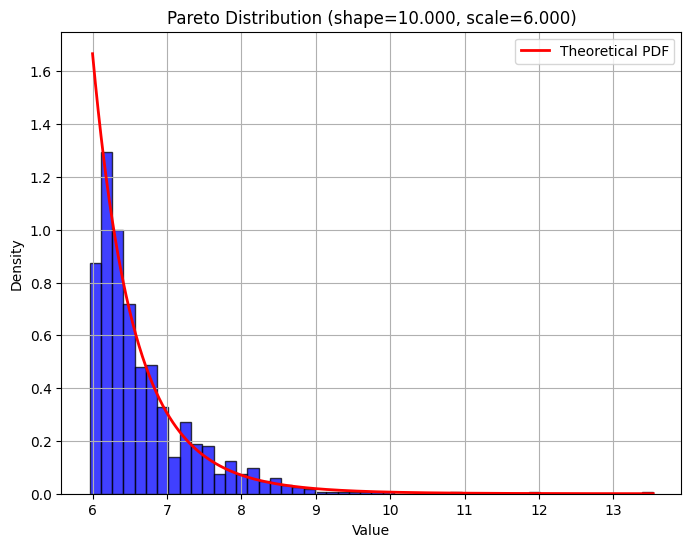

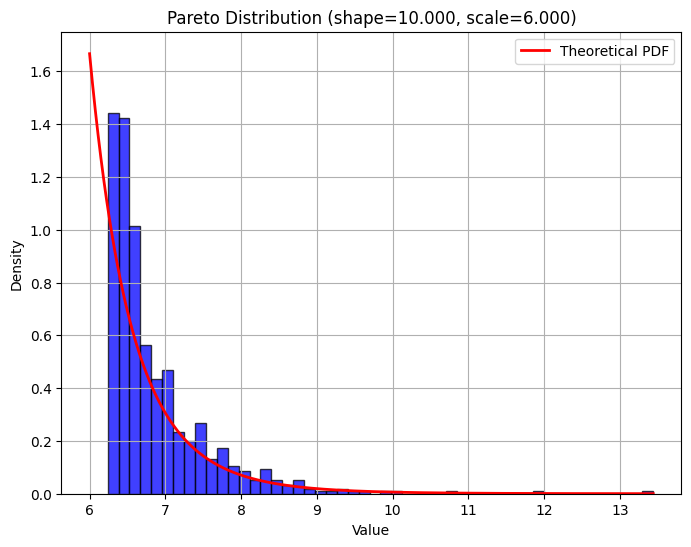

In [5]:
G0 = generate_g(*theta_0, num_samples=N2)
G1 = generate_g(*theta_1, num_samples=N2)
G2 = generate_g(*theta_2, num_samples=N2)

FY1 = (1 - p1) * G0 + p1 * G1
plot_samples_with_pareto_baseline(FY1, *theta_0)

FY2 = (1 - p2) * G0 + p2 * G2
plot_samples_with_pareto_baseline(FY2, *theta_0)

In [7]:
run_tests(
    theta_0,
    theta_1,
    theta_2,
    p1,
    p2,
    alphas=[alpha_1, alpha_2],
    num_samples=[N1, N2]
)


=======Testing with N=80 samples=======
Testing with p=0.06812920690579613 and theta=(5.273697218066576, 4.785938897200182)
	Kolmogorov-Smirnov
		P-value: 0.97936
		Reject the null hypothesis: p-value < α(0.1) = False
		Reject the null hypothesis: p-value < α(0.01) = False
	Cram´er–von Mises
		P-value: 0.96984
		Reject the null hypothesis: p-value < α(0.1) = False
		Reject the null hypothesis: p-value < α(0.01) = False
	Anderson-Darling
		P-value: 0.89580
		Reject the null hypothesis: p-value < α(0.1) = False
		Reject the null hypothesis: p-value < α(0.01) = False
	Dvoretzky–Kiefer–Wolfowitz Inequality
		KS Statistic: 0.07500
		Reject the null hypothesis: KS Statistic > 0.13683(α = 0.1) = False
		Reject the null hypothesis: KS Statistic > 0.18197(α = 0.01) = False
Testing with p=0.12043656049987451 and theta=(7.902231125466136, 31.971223758837382)
	Kolmogorov-Smirnov
		P-value: 0.00005
		Reject the null hypothesis: p-value < α(0.1) = True
		Reject the null hypothesis: p-value < α(0.01